<a href="https://github.com/ukrNagibator">Krutsenko Dmytro</a>, 2024

<h1 align="center">Лабораторна робота 3. Регуляризація в задачах машинного навчання. Стохастичний градінтний спуск з регуляризацією</h1>
<p><b>Метa:</b> закріпити на практиці використання алгоритмів регуляризації в задачах оптимізації функціонала якості засобами мови Python</p>

<h2> Завдання для самостійної роботи </h2>

<h3> Приклад поліноміальної регресії без регуляризації
</h3>

In [14]:
import numpy as np

# Функція для передбачення значень поліноміальної моделі
def predict_poly(x, koeff):
    res = 0
    # Обчислення значень для кожного степеня x та відповідного коефіцієнта
    xx = [x ** (len(koeff) - n - 1) for n in range(len(koeff))]

    # Обчислення значення полінома за формулою
    for i, k in enumerate(koeff):
        res += k * xx[i]

    return res

# Створення даних для x та y
x = np.arange(0, 10.1, 0.1)
y = np.square(x) + 3 * x - 5 # обчислення значення функції

# Обрання кожної другої точки для тренувальних даних
x_train, y_train = x[::2], y[::2]

N = len(x)

# Підгонка полінома 10-го степеня до тренувальних даних
z_train = np.polyfit(x_train, y_train, 15)
print(z_train)

[ 1.91798354e-21 -1.43800864e-19  4.84457943e-18 -9.68669622e-17
  1.27897699e-15 -1.17384700e-14  7.67715643e-14 -3.60806069e-13
  1.21318058e-12 -2.87013811e-12  4.63250881e-12 -4.85749392e-12
  3.07755199e-12  1.00000000e+00  3.00000000e+00 -5.00000000e+00]


<h3>Приклад поліноміальної регресії з L2-регуляризатором</h3>


[-2.92569681e+00  2.89461843e-01  4.12106828e-01  4.61698412e-01
  3.44141467e-01  1.88036049e-02 -2.15576148e-01  1.11926260e-01
 -2.74737095e-02  3.83012914e-03 -3.11427131e-04  1.38080793e-05
 -2.58682604e-07]


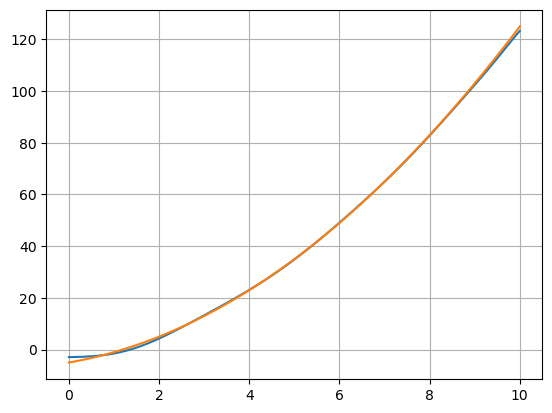

In [15]:
# Приклад роботи регуляризатора L2

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 2 + 3 * a - 5 for a in x])  # функція у вигляді полінома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # розмір простору ознак (степінь полінома N-1)
L = 20  # при збільшенні N збільшується L (кратно): 12; 0.2   13; 20    15; 5000

X = np.array([[a ** n for n in range(N)] for a in x])  # матриця вхідних векторів
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матриця lambda*I
IL[0][0] = 0  # перший коефіцієнт не регуляризується
X_train = X[::2]  # навчальна вибірка
Y = y_train  # навчальна вибірка

# обчислення коефіцієнтів за формулою w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL) # Тут і нижче @ - оператор точного матричного множення
w = Y @ X_train @ A
print(w)

# відображення початкового графіка та прогнозу
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy) # прогноз моделі
plt.plot(x, y) # справжня поведідка функції
plt.grid(True)
plt.show()

<h3> Бінарний лінійни класифікатор з L1-регуляризатором
</h3>

[ 2.84680360e-06  6.35582930e-07 -9.59193363e-06  1.84680360e-05
  1.90763558e-02  4.40741193e-03]
1.00474293788977


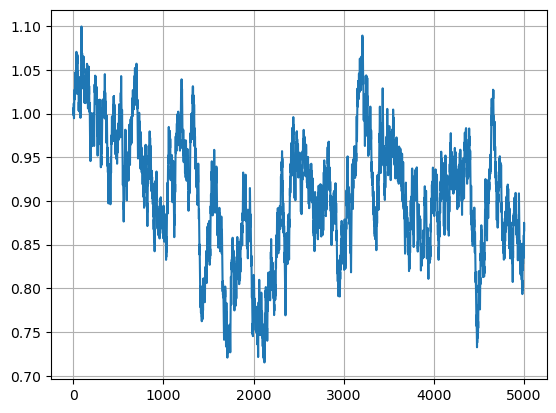

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L1 = 1.0 # Коефіцієнт L1-регуляризатора 
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Навчальна вибірка з трьома ознаками (третій - константа +1)
array_x = []
array_y = []
filename = 'data.txt'  # Назва вашого файлу
    # Відкриваємо файл для читання
with open(filename, 'r') as file:
    for line in file:
        values = line.strip().split()
        row = [int(value) for value in values]
        if len(row) == 2:
            array_x.append(row)
        else:
            array_y = row
            
array_x = [x + [1] for x in array_x]  # Додаємо зміщення для кожного прикладу    
array_x = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in array_x]
x_train = np.array(array_x)
y_train = np.array(array_y)

fn = len(x_train[0])
n_train = len(x_train)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001             # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                 # Кількість ітерацій SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train[k], y_train[k])        # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # Справжнє значення емпіричного ризику після навчання
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()

<h3> Бінарний лінійни класифікатор з L2-регуляризатором</h3>

[ 7.18407059e-04  1.48911111e-03 -3.31764815e-08  1.16831706e-02
  1.93902111e-02  1.55366908e-02]
1.0003420786286301


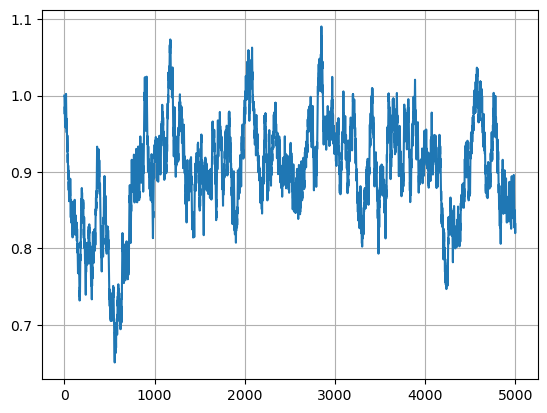

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L2 = 0.01 # Коефіцієнт L2-регуляризатора 
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L2 * np.sign(w)

# Навчальна вибірка з трьома ознаками (третій - константа +1)
array_x = []
array_y = []
filename = 'data.txt'  # Назва вашого файлу
    # Відкриваємо файл для читання
with open(filename, 'r') as file:
    for line in file:
        values = line.strip().split()
        row = [int(value) for value in values]
        if len(row) == 2:
            array_x.append(row)
        else:
            array_y = row
            
array_x = [x + [1] for x in array_x]  # Додаємо зміщення для кожного прикладу   
array_x = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in array_x]
x_train = np.array(array_x)
y_train = np.array(array_y)

fn = len(x_train[0])
n_train = len(x_train)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001             # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                 # Кількість ітерацій SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train[k], y_train[k])        # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # Справжнє значення емпіричного ризику після навчання
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()

<h1 align="center">Контрольні запитання</h1>


1. L2-регуляризатор - це метод регуляризації, що використовується в задачах машинного навчання для уникнення перенавчання (overfitting) і контролю за складністю моделі. У регресії L2-регуляризатор додає суму квадратів значень вагових коефіцієнтів до функції втрат, а в класифікації - до штрафу за помилкові класифікації.и
2. Основна відмінність між L1 та L2 регуляризаторами полягає в тому, як вони штрафують величину коефіцієнтів моделі. L1-регуляризатор додає суму абсолютних значень коефіцієнтів, тоді як L2-регуляризатор додає суму квадратів коефіцієнтів. Це призводить до інших властивостей моделі: L1 може призводити до розріджених векторів ваги, тоді як L2 зазвичай породжує рівномірніші ваги з меншою амплітудою.в3
3. Простий лінійний бінарний класифікатор може бути реалізований за допомогою стохастичного градієнтного спуску використовуючи логістичну (сигмоїдальну) функцію втрату.в4
4. Стохастичний градієнтний спуск (SGD) - це метод оптимізації, що використовується для навчання моделей машинного навчання, особливо там, де набір даних дуже великий. Він використовує випадковий підвибірку даних для оцінки градієнта функції втрат. Стратегія спрощує обчислення градієнта та дозволяє збільшити швидкість навчання.
5. Використання регуляризаторів (L1, L2) впливає на навчання моделі шляхом контролю за перенавчанням і створенням більш загальних моделей. Вони допомагають уникнути перенавчання, зменшуючи амплітуду коефіцієнтів моделі, що дозволяє покращити її загальні характеристики та здатність узагальнення до нових даних. Крім того, вони також можуть допомагати управляти ефектом розрідженості в даних та покращувати усталеність та швидкість збіжності алгоритмів оптимізації 
структури даниl>